# 栈(stack)
- 栈顶插入一个数据和从栈顶删除一个数据。后进先出、先进后出。
> 放盘子的时候，都是从下往上一个一个放；取的时候，我们也是从上往下一个一个地依次取，不能从中间任意抽出。
- 栈是一种操作受限的数据结构，只支持进栈和出栈操作。
- 栈可以通过数组实现，也可以通过链表实现。其时间复杂度都是$O(1)$

## 使用单链表构建栈

In [4]:
from typing import Optional

class Node:
    
    def __init__(self, data: int, next=None):
        """
        _data: 节点数据
        _next: 指针指向下一个节点
        """
        self._data = data
        self._next = next
    

class LinkedStack:
    """A stack based upon singly-linked list.
    """
    def __init__(self):
        """_top当前顶节点"""
        self._top: Node = None
    
    def push(self, value: int):
        """进栈：
        1.创建带数据的新节点
        2.修改新节点的_next指针，指向上一个节点(也就是顶层节点)
        3.设置顶层节点为新建节点
        """
        new_top = Node(value)
        new_top._next = self._top
        self._top = new_top
    
    def pop(self) -> Optional[int]:
        """出栈：
        1.判断顶层节点为True
        2.获取顶层节点的_data数据
        3.设置顶层节点为顶层的下一个节点(_next)
        4.返回顶层节点的值
        """
        if self._top:
            value = self._top._data
            self._top = self._top._next
            return value
    
    def __repr__(self) -> str:
        current = self._top
        nums = []
        while current:
            nums.append(current._data)
            current = current._next
        return " ".join(f"{num}]" for num in nums)

if __name__ == "__main__":
    stack = LinkedStack()
    for i in range(9):
        stack.push(i)
    print(stack)
    for _ in range(3):
        stack.pop()
    print(stack)

8] 7] 6] 5] 4] 3] 2] 1] 0]
5] 4] 3] 2] 1] 0]


## 案例
> 问题1：实现浏览器的前进和后退功能？  
当你依次访问完一串页面a-b-c之后，点击浏览器的后退按钮，就可以查 看之前浏览过的页面b和a。当你后退到页面a，点击前进按钮，就可以 重新查看页面b和c。但是，如果你后退到页面b后，点击了新的页面d， 那就无法再通过前进、后退功能查看页面c了。   

答：   
使用两个栈，X和Y，我们把首次浏览的页面依次压入栈X，当点击 后退按钮时，再依次从栈X中出栈，并将出栈的数据依次放入栈Y。当 我们点击前进按钮时，我们依次从栈Y中取出数据，放入栈X中。当栈X 中没有数据时，那就说明没有页面可以继续后退浏览了。当栈Y中没有 数据，那就说明没有页面可以点击前进按钮浏览了。  

1. 比如你顺序查看了a，b，c三个页面，我们就依次把a，b，c压入X栈：图1  
2. 当你点击后退按钮，从页面c后退到页面a之后，就依次把c和b从栈X中弹出，并依次压入栈Y：如图2    
3. 这个时候你又想看页面b，点击前进按钮回到b页面，就把b再从栈Y中出栈，放入X中：如图3  
4. 这个时候通过b页面跳转到新的d页面，页面c就无法再通过前进、后退按钮重复查看了，所以需要清空栈Y：如图4
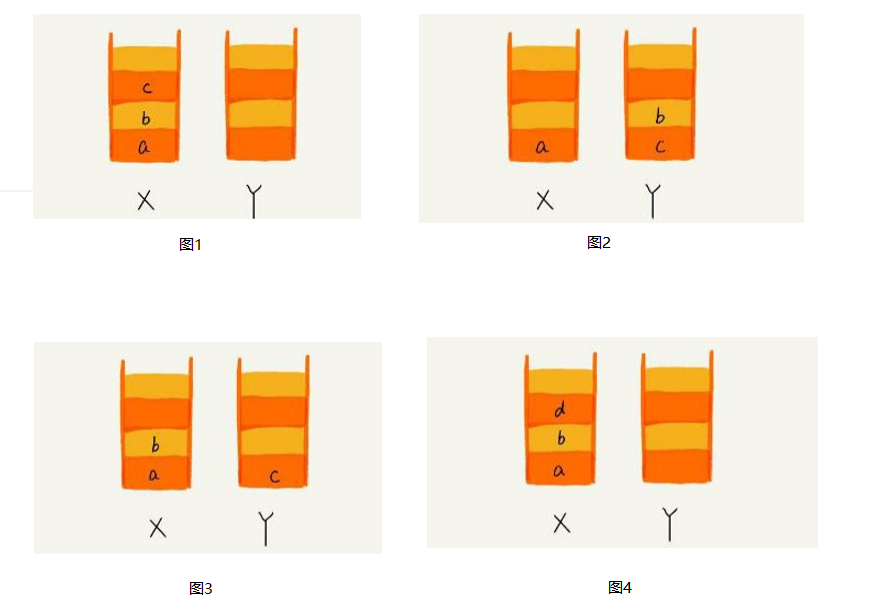

## 算法题
- leetcode上关于栈的题目：20,155,232,844,224,682,496

In [39]:
# 开闭符号合算法
class Solution:
    def isValid(self, s: str):
        stack = []
        mapping = {'(': ')', '{': '}', '[': ']', '#': '$'}
        for char in s:
            if char not in mapping:
                #print(stack)
                top_element = stack.pop() if stack else '#'
                if mapping[top_element] != char:
                    return False
            else:
                stack.append(char)
        return not stack

Solution().isValid('}([)')

False